In [1]:
import sys 
import warnings
warnings.filterwarnings('ignore')
sys.path.append('/Users/lei/home/studyhall/modeling-rsa/lib') 
 
import pickle 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor as random_forest
from sklearn import metrics

import torch 
from torch.utils.data import DataLoader 
 
from ffnn import FFNN 

In [2]:
device = torch.device("mps")
print("The model will be running on", device, "device")

The model will be running on mps device


In [3]:
with open('../pk_files/dataset.pkl', 'rb') as f:
    (data_train, data_val) = pickle.load(f)

In [4]:
print("shape of any feature sample in data_train: {}".format(np.shape(data_train[0][0]))) 
print("shape of any label sample in data_train: {}".format(np.shape(data_train[0][1]))) 
print("shape of any feature sample in data_val: {}".format(np.shape(data_val[0][0]))) 
print("shape of any label sample in data_val: {}".format(np.shape(data_val[0][1]))) 

shape of any feature sample in data_train: torch.Size([5])
shape of any label sample in data_train: torch.Size([3])
shape of any feature sample in data_val: torch.Size([5])
shape of any label sample in data_val: torch.Size([3])


In [5]:
loader_train = DataLoader(data_train, batch_size=16, num_workers=4, shuffle=True) 
loader_val = DataLoader(data_val, batch_size=16, num_workers=4, shuffle=True) 
 
net = FFNN(device)
net = net.to(net.device) 
rf = random_forest(n_estimators=300, max_features=3)

In [6]:
lr = 0.01
num_epochs = 10 

In [7]:
# with open('../pk_files/train_test_split.pkl', 'rb') as f:
#     X_train, X_val, y_train, y_val = pickle.load(f)

In [8]:
# rf.fit(np.nan_to_num(X_train), y_train)

In [9]:
# y_hats = rf.predict(np.nan_to_num(X_val))
# print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_val, y_hats))
# print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_val, y_hats))
# print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_val, y_hats, squared=False))
# print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_val, y_hats))

In [10]:
with open('../models/rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [19]:
net.fit(num_epochs, lr, loader_train, loader_val) 

100%|██████████| 10/10 [13:26<00:00, 80.67s/it]


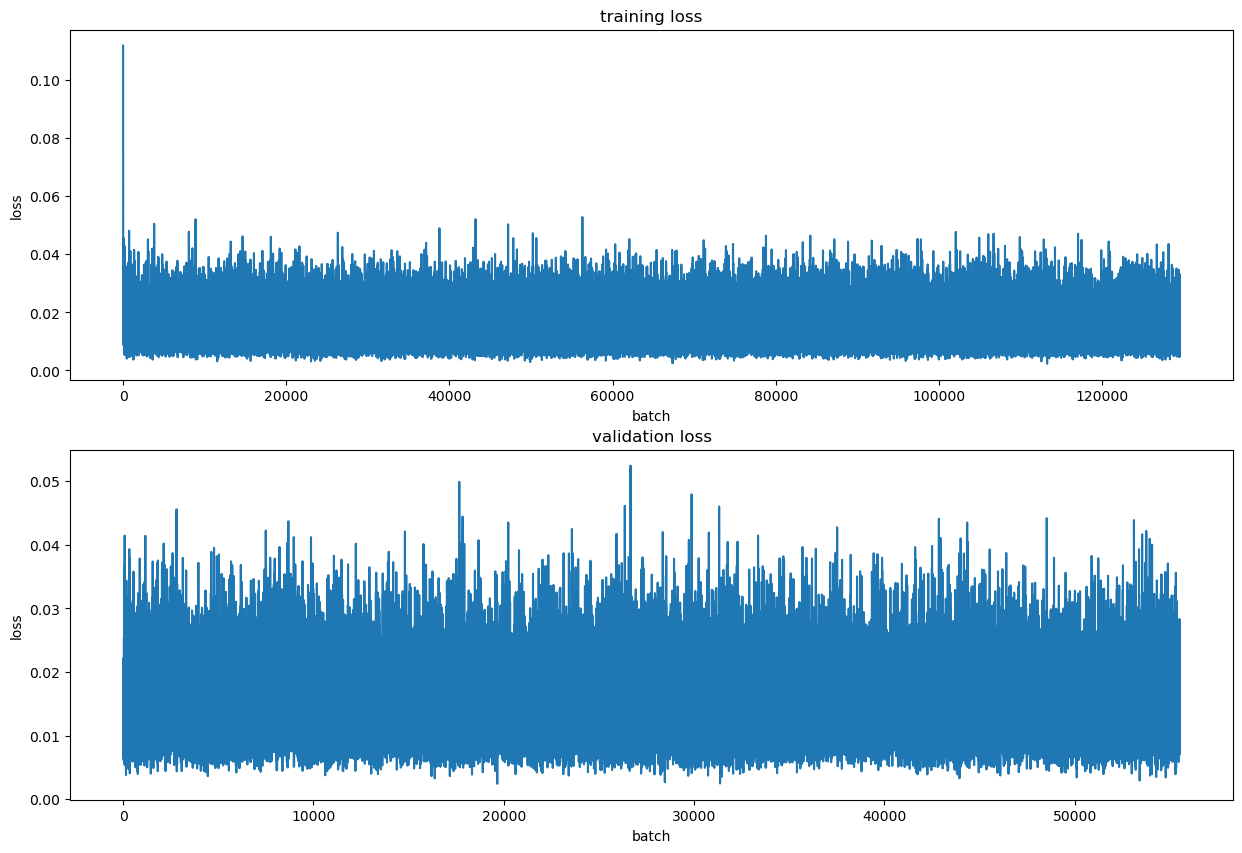

In [21]:
net.evaluate()

In [18]:
torch.save(net.state_dict(), '../models/ffnn_30_001_checkpoint.pt')